In [1]:
import asimov_database as ad
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

pr = ad.ParquetReader()

In [2]:
dataframe = pr.load_level_book(['WDOG20','DOLG20'], '2020-01-06')

/home/asimovws/.local/lib/python3.6/site-packages/asimov_database/database/parquet_reader.py:311: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  df = pd.concat([ask, bid]).sort_values(by='i', kind = 'mergesort').reset_index()
/home/asimovws/.local/lib/python3.6/site-packages/asimov_database/database/parquet_reader.py:372: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  dl = pd.concat([ask_wdo, bid_wdo]).sort_values(by='i', kind = 'mergesort').reset_index()
/home/asimovws/.local/lib/python3.6/site-packages/asimov_database/database/parquet_reader.py:397: FutureWarnin

In [3]:
total = dataframe.copy()

In [8]:
total_ = total[['index', 'event_type', 'id', 'side', 'position', 'symbol', 'msg_seq_num', 'ask_0', 'ask_quantity_0', 'bid_0', 'bid_quantity_0', 'ask_wdo_0', 'ask_quantity_wdo_0', 'bid_wdo_0', 'bid_quantity_wdo_0']][ (total['ask_0'] != 0) & (total['bid_0'] != 0)]

total_['spread_dol'] = total['ask_0'] - total['bid_0']
total_['spread_wdo'] = total['ask_wdo_0'] - total['bid_wdo_0']


#Procura pelo primeiro momento de mercado estável
begin = np.where( (total_['spread_wdo'] == 0.5) & (total_['spread_dol'] == 0.5) & (total_['ask_0'] == total_['ask_wdo_0']) & (total_['bid_0'] == total_['bid_wdo_0']))[0][0]

total_.rename({'index' : 'timestamp'}, axis = 1, inplace = True)

total_.reset_index(inplace=True)
# Inicia análise no primeiro momento de estabilidade

slice_ = total_.loc[begin:]

#Calcula mid price
slice_['mid_price'] = (slice_['ask_0'] + slice_['bid_0'])/2.0
slice_['mid_price_wdo'] = (slice_['ask_wdo_0'] + slice_['bid_wdo_0'])/2.0

#         self.total__= slice_


#Filtras msg_seq_number e observa apenas o ultimo evento ocorrido
slice_['repeat'] = False
slice_['repeat'][slice_['msg_seq_num'] != slice_['msg_seq_num'].shift(-1)] = True
slice_  = slice_[slice_['repeat']]
# slice_ = slice_.drop(['repeat', 'event_type', 'symbol', 'side'], axis =1).reset_index()

/home/asimovws/.local/lib/python3.6/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/asimovws/.local/lib/python3.6/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/asimovws/.local/lib/python3.6/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pand

In [9]:
slice_.reset_index(inplace=True)
slice_.drop({'index', 'level_0', 'repeat'}, axis =1, inplace=True)

In [10]:
slice_ = slice_.loc[:3073745]

In [11]:
slice_


,timestamp,event_type,id,side,position,symbol,msg_seq_num,ask_0,ask_quantity_0,bid_0,bid_quantity_0,ask_wdo_0,ask_quantity_wdo_0,bid_wdo_0,bid_quantity_wdo_0,spread_dol,spread_wdo,mid_price,mid_price_wdo
0,2020-01-06 12:00:50.186000+00:00,INSERT,125819173,B,1.0,WDO,21223,4065.0,5.0,4064.5,5.0,4065.0,22.0,4064.5,5.0,0.5,0.5,4064.75,4064.75
1,2020-01-06 12:00:50.186000+00:00,CHANGE,125819174,A,1.0,WDO,21224,4065.0,5.0,4064.5,5.0,4065.0,17.0,4064.5,5.0,0.5,0.5,4064.75,4064.75
2,2020-01-06 12:00:50.186000+00:00,CHANGE,125819175,A,1.0,WDO,21225,4065.0,5.0,4064.5,5.0,4065.0,10.0,4064.5,5.0,0.5,0.5,4064.75,4064.75
3,2020-01-06 12:00:50.186000+00:00,DELETE,125819176,B,2.0,WDO,21226,4065.0,5.0,4064.5,5.0,4065.0,10.0,4064.5,5.0,0.5,0.5,4064.75,4064.75
4,2020-01-06 12:00:50.186000+00:00,DELETE,125819177,B,1.0,WDO,21227,4065.0,5.0,4064.5,5.0,4065.0,10.0,4064.0,118.0,0.5,1.0,4064.75,4064.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3073741,2020-01-06 21:00:50.994000+00:00,DELETE,129452760,B,9.0,WDO,3332653,4070.0,25.0,4069.5,80.0,4070.0,109.0,4069.5,71.0,0.5,0.5,4069.75,4069.75
3073742,2020-01-06 21:00:50.994000+00:00,DELETE,129452761,B,9.0,WDO,3332654,4070.0,25.0,4069.5,80.0,4070.0,109.0,4069.5,67.0,0.5,0.5,4069.75,4069.75
3073743,2020-01-06 21:00:50.994000+00:00,DELETE,129452762,B,7.0,WDO,3332655,4070.0,25.0,4069.5,80.0,4070.0,109.0,4069.5,63.0,0.5,0.5,4069.75,4069.75
3073744,2020-01-06 21:00:50.994000+00:00,DELETE,129452763,A,15.0,DOL,3332656,4070.0,25.0,4069.5,80.0,4070.0,109.0,4069.5,63.0,0.5,0.5,4069.75,4069.75


In [12]:
# Posicoes do mercado 100% estavel
index_stable  = np.where( (slice_['spread_wdo'] == 0.5) & (slice_['spread_dol'] == 0.5) & (slice_['ask_0'] == slice_['ask_wdo_0']) & (slice_['bid_0'] == slice_['bid_wdo_0']))[0]

# Posicões de 1 tick ask open WDO
index_1tick_ask_wdo  = np.where( (slice_['spread_wdo'] == 1.0) & (slice_['spread_dol'] == 0.5) & (slice_['ask_0'] <= slice_['ask_wdo_0']) & (slice_['bid_0'] == slice_['bid_wdo_0']))[0]

# Posicões de 1 tick bid open WDO
index_1tick_bid_wdo  = np.where( (slice_['spread_wdo'] == 1.0) & (slice_['spread_dol'] == 0.5) & (slice_['ask_0'] == slice_['ask_wdo_0']) & (slice_['bid_0'] >= slice_['bid_wdo_0']))[0]

# Posicões de 1 tick ask open DOL
index_1tick_ask_dol  = np.where( (slice_['spread_wdo'] == 0.5) & (slice_['spread_dol'] == 1.0) & (slice_['ask_0'] >= slice_['ask_wdo_0']) & (slice_['bid_0'] == slice_['bid_wdo_0']))[0]

# Posicões de 1 tick bid open DOL
index_1tick_bid_dol  = np.where( (slice_['spread_wdo'] == 0.5) & (slice_['spread_dol'] == 1.0) & (slice_['ask_0'] == slice_['ask_wdo_0']) & (slice_['bid_0'] <= slice_['bid_wdo_0']))[0]

# Posicões de >=2 ticks ask open WDO
index_2tick_ask_wdo  = np.where( (slice_['spread_wdo'] > 1.0) & (slice_['spread_dol'] == 0.5) & (slice_['ask_0'] <= slice_['ask_wdo_0']) & (slice_['bid_0'] == slice_['bid_wdo_0']))[0]

# Posicões de >=2 ticks bid open WDO
index_2tick_bid_wdo  = np.where( (slice_['spread_wdo'] > 1.0) & (slice_['spread_dol'] == 0.5) & (slice_['ask_0'] == slice_['ask_wdo_0']) & (slice_['bid_0'] >= slice_['bid_wdo_0']))[0]

# Posicões de >=2 ticks ask open DOL
index_2tick_ask_dol  = np.where( (slice_['spread_wdo'] == 0.5) & (slice_['spread_dol'] > 1.0) & (slice_['ask_0'] >= slice_['ask_wdo_0']) & (slice_['bid_0'] == slice_['bid_wdo_0']))[0]

# Posicões de >=2 ticks bid open DOL
index_2tick_bid_dol  = np.where( (slice_['spread_wdo'] == 0.5) & (slice_['spread_dol'] > 1.0) & (slice_['ask_0'] == slice_['ask_wdo_0']) & (slice_['bid_0'] <= slice_['bid_wdo_0']))[0]

# Posicões de distorção fraca WDO up
index_weak_dist_wdo_up  = np.where( (slice_['spread_wdo'] == 0.5) & (slice_['spread_dol'] == 0.5) & (slice_['ask_0'] == slice_['bid_wdo_0']))[0]

# Posicões de distorção fraca DOL up
index_weak_dist_dol_up  = np.where( (slice_['spread_wdo'] == 0.5) & (slice_['spread_dol'] == 0.5) & (slice_['bid_0'] == slice_['ask_wdo_0']))[0]

# Posicões de distorção forte WDO up
index_strg_dist_wdo_up  = np.where( (slice_['spread_wdo'] == 0.5) & (slice_['spread_dol'] == 0.5) & (slice_['ask_0'] < slice_['bid_wdo_0']))[0]

# Posicões de distorção forte DOL up
index_strg_dist_dol_up  = np.where( (slice_['spread_wdo'] == 0.5) & (slice_['spread_dol'] == 0.5) & (slice_['bid_0'] > slice_['ask_wdo_0']))[0]



In [35]:
slice_['character'] = 'Nao_Modelado'
slice_['character'].loc[index_stable] = 'stable'
slice_['character'].loc[index_1tick_ask_wdo] = '1tick_ask_wdo'
slice_['character'].loc[index_1tick_bid_wdo] = '1tick_bid_wdo'
slice_['character'].loc[index_1tick_ask_dol] = '1tick_ask_dol'
slice_['character'].loc[index_1tick_bid_dol] = '1tick_bid_dol'
slice_['character'].loc[index_2tick_ask_wdo] = '2tick_ask_wdo'
slice_['character'].loc[index_2tick_bid_wdo] = '2tick_bid_wdo'
slice_['character'].loc[index_2tick_ask_dol] = '2tick_ask_dol'
slice_['character'].loc[index_2tick_bid_dol] = '2tick_bid_dol'
slice_['character'].loc[index_weak_dist_wdo_up] = 'weak_dist_wdo_up'
slice_['character'].loc[index_weak_dist_dol_up] = 'weak_dist_dol_up'
slice_['character'].loc[index_strg_dist_wdo_up] = 'strg_dist_wdo_up'
slice_['character'].loc[index_strg_dist_dol_up] = 'strg_dist_dol_up'


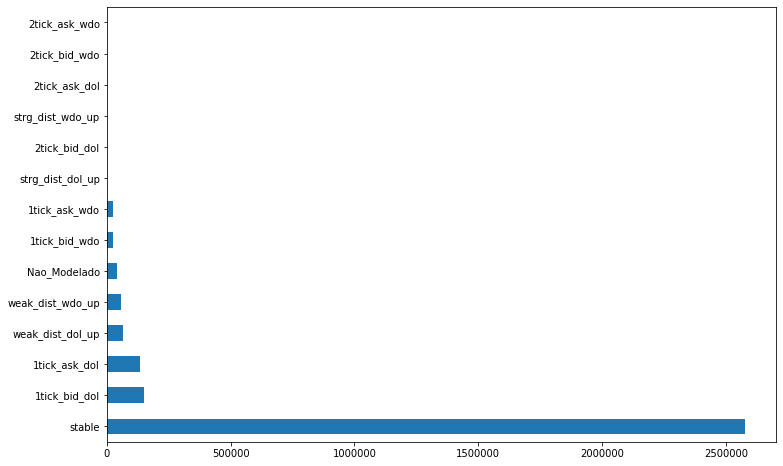

In [42]:
slice_['character'].value_counts().plot(kind='barh', figsize = (12,8))